In [4]:
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/kaggle/kaggle.json

Saving kaggle.json to kaggle.json
chmod: cannot access '/root/kaggle/kaggle.json': No such file or directory


Used the stacked model from this wonderful resource 
(https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)[https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard]

In [16]:
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       3010           False  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      11558            True  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4420            True  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         47           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       3644           False  
open-images-2019-object-detection                  2019-10-01 23:59:00  Research           $25,000      

In [0]:
!chmod 600 ~/.kaggle/kaggle.json
#!kaggle competitions download -c house-price-advanced-regressoin-technique

In [18]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
!ls

data_description.txt  sample_data  sample_submission.csv  test.csv  train.csv


In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import stats, norm, skew
from scipy.special import boxcox1p

In [83]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [85]:
train_df.columns.to_series().groupby(train.dtypes).groups

{dtype('float64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'

So we can see that a lot of data are categorical . Thus , one hot encoding for all of them will reuslt in a very large dataset

[]

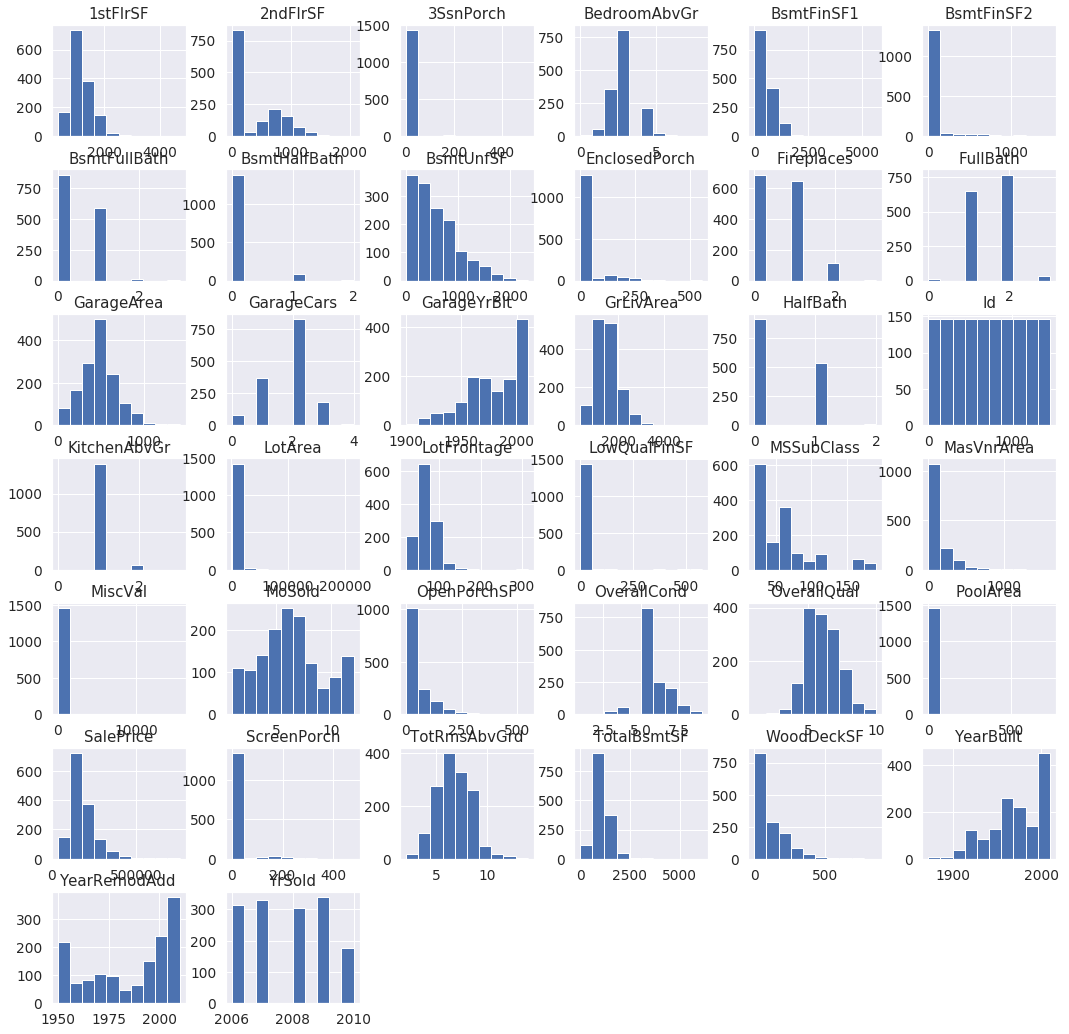

In [86]:
train_df.hist(figsize=(18,18))
plt.plot()

In [0]:
def describe_data(df, train=(False, None)):
  if train[0] == True :
    print("There are {} rows and {} columns".format(df.shape[0], df.shape[1]))
    print("There are {} numerical and {} categorical columns".format(df.select_dtypes(include = [np.number]).shape[1], 
                                                                    df.select_dtypes(include = ['object']).shape[1]))


    ## finding the missing values
    print("Finding the missing values \n")
    print('\n Columns with missing values : {}'.format(len(df.columns[df.isna().any()].to_list())))
    print(df.columns[df.isna().any()].to_list())
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count()) * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(20))


    print("---------------------------------------------------\n \n")

    ## now checking the skewness in all the features
    print('Checking for the skewness in features \n \n')
    numeric_features = df.select_dtypes(include=[np.number]).columns.values
    skewed_feats = df[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    print("Skew in numerical Features")
    skewness = pd.DataFrame({
        'skewness': skewed_feats
    })
    print(skewness.head(20))

    ## visualizing the missing values
    plt.subplots(figsize=(12,9))
    sns.barplot(x=missing_data.index[missing_data.Percent > 1.0], y=missing_data.Percent[missing_data.Percent > 1.0])
    plt.xticks(rotation='90')
    plt.xlabel('Features')
    plt.ylabel('Percent')
    plt.title('Percent missing data by feature')
    print('\n \n ---------------------------------------------- \n \n')

    print("-----------------------------------------------\n \n")
    print(" Making the Distplot for the dependent var \n \n")
    sns.distplot(df[train[1]], fit=norm)
    (mu, sigma) = norm.fit(df[train[1]])
    print("The mu is {:.2f} and sigma is {:.2f}".format(mu, sigma))
    plt.legend('Normal dist ( mu: {:.2f} sigma: {:.2f} )'.format(mu, sigma))
    plt.ylabel('Frequency')
    plt.title('{} distribution'.format(train[1]))

    print("------------------------------------------------\n \n")

    ## Correlation
    print("Making the correlation matrix and graph")
    corrmat = df.corr()
    plt.subplots(figsize=(12,9))
    sns.heatmap(corrmat)
    print('\n \n')
    print("Now making correlation matrix with the top 10 correlations")
    k = 10 #number of variables for heatmap
    cols = corrmat.nlargest(k, train[1])[train[1]].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    plt.subplots(figsize=(12,9))
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    print('\n \n ---------------------------------------------- \n \n')


    print(" Data has been finished ...... ")
  else :
    print("There are {} rows and {} columns".format(df.shape[0], df.shape[1]))
    print("There are {} numerical and {} categorical columns".format(df.select_dtypes(include = [np.number]).shape[1], 
                                                                    df.select_dtypes(include = ['object']).shape[1]))


    ## finding the missing values
    print("Finding the missing values \n")
    print('\n Columns with missing values : {}'.format(len(df.columns[df.isna().any()].to_list())))
    print(df.columns[df.isna().any()].to_list())
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum()/df.isnull().count()) * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(20))


    print("---------------------------------------------------\n \n")

    ## now checking the skewness in all the features
    print('Checking for the skewness in features \n \n')
    numeric_features = df.select_dtypes(include=[np.number]).columns.values
    skewed_feats = df[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
    print("Skew in numerical Features")
    skewness = pd.DataFrame({
        'skewness': skewed_feats
    })
    print(skewness.head(20))

    ## visualizing the missing values
    plt.subplots(figsize=(12,9))
    sns.barplot(x=missing_data.index[missing_data.Percent > 1.0], y=missing_data.Percent[missing_data.Percent > 1.0])
    plt.xticks(rotation='90')
    plt.xlabel('Features')
    plt.ylabel('Percent')
    plt.title('Percent missing data by feature')
    print('\n \n ---------------------------------------------- \n \n')

  return missing_data, skewness
  
  

In [0]:
def preprocess(df, train=(False, None), missing=(False, None) ,skewness=(False, None)):
  ## handling the skewness of data if any
  if skewness[0] == True:
    if train[0] == True:
      ## handle skewness
      #We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
      df[train[1]] = np.log1p(df[train[1]])
      ## checking the new plot
      sns.distplot(df[train[1]], fit=norm)
      print(" ------------------------------------- \n \n ")
      ## mu and sigma
      (mu, sigma) = norm.fit(df[train[1]])
      print("The mu is {:.2f} and sigma is {:.2f}".format(mu, sigma))
      plt.legend('Normal dist ( mu: {:.2f} sigma: {:.2f} )'.format(mu, sigma))
      plt.ylabel('Frequency')
      plt.title('{} distribution'.format(train[1]))
    
    skewness_data = skewness[1]
    skewness_data = skewness_data[abs(skewness_data) > 0.75]
    print("There are {} skewed numerical features to Box Cox transform".format(skewness_data.shape[0]))
    skewed_features = skewness_data.index
    lam=0.15
    for feat in skewed_features:
      df[feat] = boxcox1p(df[feat], lam)
    print("All the features have been box cox transformed ... \n \n")
    
  else:
    print("There seemned no skewness in data ... ")
          
          
  print("Starting out with handling missing data .... \n \n")
  ## handling missing data
  if missing[0] == True:
    missing_data = missing[1]
    cols_to_be_dropped = []
    for percent in missing_data.Percent:
      if percent > 15.0 :
        cols_to_be_dropped.append(missing_data.index[missing_data['Percent'] == percent][0])
        print("{} added to the column which are to eb dropped since it has {} of information missing".format(missing_data.index[missing_data['Percent'] == percent][0],
                                                                                                            percent))
    print(" These columns have been added to be dropped in the dataset since they loose more than 15% of the information. --> {}".format( cols_to_be_dropped ) ) 
    df.drop(cols_to_be_dropped, axis=1, inplace=True)
    print(" The columns have been dropped . ")
    
    ## Now handling the columns which have some information lost ... the numerical feautres
    numeric_features = list(df.select_dtypes(include=[np.number]).columns.values)
    df[numeric_features] = df[numeric_features].apply(lambda x: x.fillna(x.median()), axis=0)
          
    ## Categorical Features now
    categorical_variables = list(df.select_dtypes(exclude=['int64','float','bool']).columns.values)
    df[categorical_variables]=df[categorical_variables].apply(lambda x: x.fillna("None"),axis=0)
  else: 
    print("There were no missing data to handle ... ")
          
  df = pd.get_dummies(df)          
  return df          
          

There are 1460 rows and 81 columns
There are 38 numerical and 43 categorical columns
Finding the missing values 


 Columns with missing values : 19
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
              Total    Percent
PoolQC         1453  99.520548
MiscFeature    1406  96.301370
Alley          1369  93.767123
Fence          1179  80.753425
FireplaceQu     690  47.260274
LotFrontage     259  17.739726
GarageCond       81   5.547945
GarageType       81   5.547945
GarageYrBlt      81   5.547945
GarageFinish     81   5.547945
GarageQual       81   5.547945
BsmtExposure     38   2.602740
BsmtFinType2     38   2.602740
BsmtFinType1     37   2.534247
BsmtCond         37   2.534247
BsmtQual         37   2.534247
MasVnrArea        8   0.547945
MasVnrType        8   0.547945
E

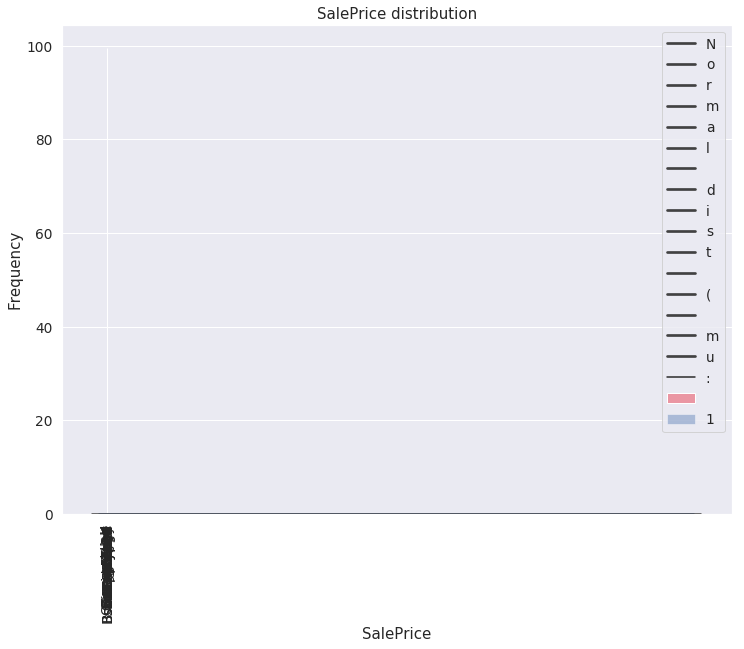

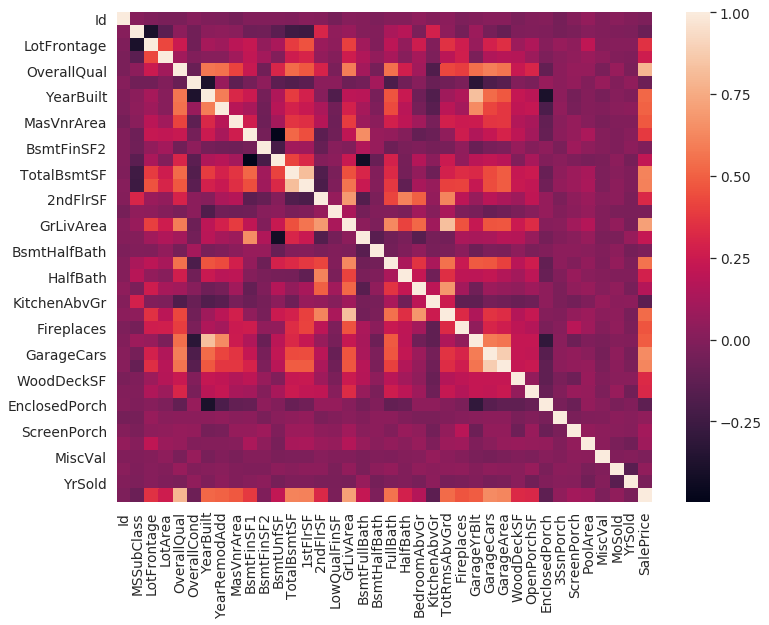

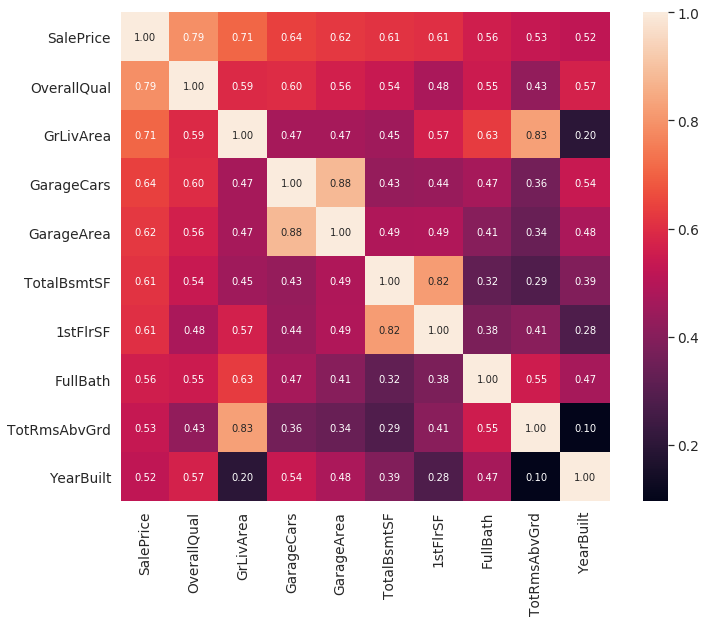


 
 ---------------------------------------------- 
 

 Data has been finished ...... 


In [89]:
missing_data, skewness = describe_data(train_df, train=(True, 'SalePrice'))

 ------------------------------------- 
 
 
The mu is 12.02 and sigma is 0.40
There are 38 skewed numerical features to Box Cox transform
All the features have been box cox transformed ... 
 

Starting out with handling missing data .... 
 

PoolQC added to the column which are to eb dropped since it has 99.52054794520548 of information missing
MiscFeature added to the column which are to eb dropped since it has 96.30136986301369 of information missing
Alley added to the column which are to eb dropped since it has 93.76712328767123 of information missing
Fence added to the column which are to eb dropped since it has 80.75342465753424 of information missing
FireplaceQu added to the column which are to eb dropped since it has 47.26027397260274 of information missing
LotFrontage added to the column which are to eb dropped since it has 17.73972602739726 of information missing
 These columns have been added to be dropped in the dataset since they loose more than 15% of the information. --> 

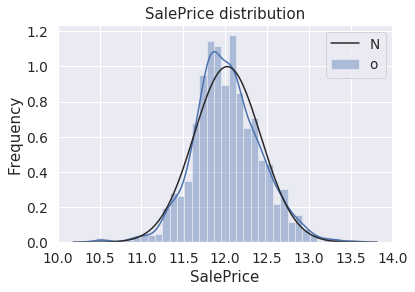

In [90]:
cleaned_data = preprocess(train_df, train=(True, 'SalePrice'), missing=(True, missing_data), skewness=(True, skewness))

In [91]:
cleaned_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.730463,5.684507,19.212182,2.440268,2.055642,14.187527,14.187527,8.059126,11.170327,0.0,7.483296,11.692623,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,2.602594,0.000000,14.187527,1.194318,10.506271,0.000000,5.714669,0.000000,0.0,0.0,0.0,0.0,1.194318,14.195323,3.156009,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1.194318,3.858807,19.712205,2.259674,2.602594,14.145138,14.145138,0.000000,12.062832,0.0,8.897844,12.792276,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,2.259674,0.730463,14.145138,1.194318,10.062098,9.010206,0.000000,0.000000,0.0,0.0,0.0,0.0,2.055642,14.193765,3.140516,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1.540963,5.684507,20.347241,2.440268,2.055642,14.184404,14.185966,7.646538,10.200343,0.0,9.917060,11.892039,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,2.259674,0.730463,14.184404,1.194318,10.775536,0.000000,5.053371,0.000000,0.0,0.0,0.0,0.0,2.750250,14.195323,3.163719,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.820334,5.968981,19.691553,2.440268,2.055642,14.047529,14.135652,0.000000,8.274266,0.0,10.468500,11.354094,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,2.440268,0.730463,14.179714,1.540963,10.918253,0.000000,4.745132,8.797736,0.0,0.0,0.0,0.0,1.194318,14.192207,3.111134,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,2.055642,5.684507,21.325160,2.602594,2.055642,14.182841,14.182841,9.391827,10.971129,0.0,10.221051,12.510588,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,2.750250,0.730463,14.182841,1.540963,11.627708,8.013884,6.314735,0.000000,0.0,0.0,0.0,0.0,3.128239,14.195323,3.176081,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


There are 1459 rows and 80 columns
There are 37 numerical and 43 categorical columns
Finding the missing values 


 Columns with missing values : 33
['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
              Total    Percent
PoolQC         1456  99.794380
MiscFeature    1408  96.504455
Alley          1352  92.666210
Fence          1169  80.123372
FireplaceQu     730  50.034270
LotFrontage     227  15.558602
GarageCond       78   5.346127
GarageQual       78   5.346127
GarageYrBlt      78   5.346127
GarageFinish     78   5.346127
GarageType       76   5.209047
BsmtCond         45 

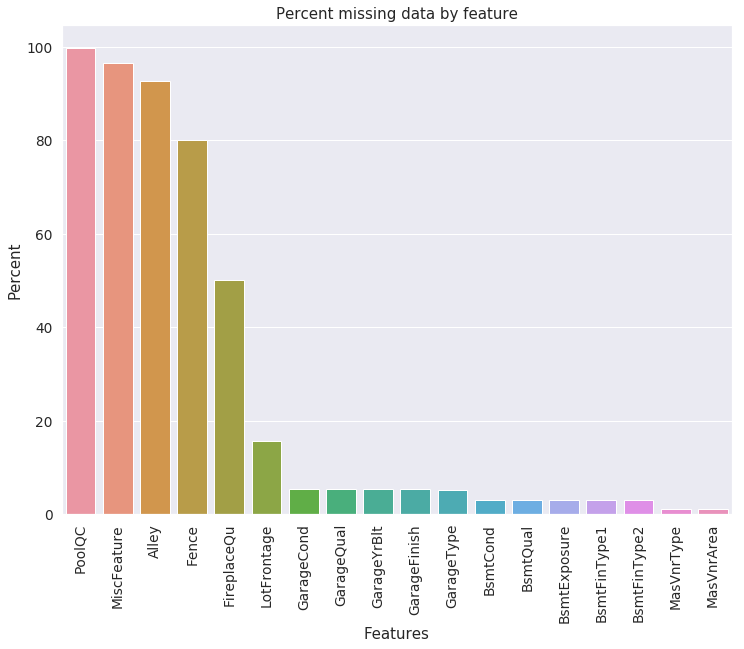

In [92]:
missing_data_test, skewness_test = describe_data(test_df, train=(False,None))

In [94]:
cleaned_data_test = preprocess(test_df, train=(False, None), missing=(True, missing_data_test), skewness=(True, skewness_test))

There are 37 skewed numerical features to Box Cox transform
All the features have been box cox transformed ... 
 

Starting out with handling missing data .... 
 

PoolQC added to the column which are to eb dropped since it has 99.7943797121316 of information missing
MiscFeature added to the column which are to eb dropped since it has 96.50445510623715 of information missing
Alley added to the column which are to eb dropped since it has 92.66620973269363 of information missing
Fence added to the column which are to eb dropped since it has 80.12337217272105 of information missing
FireplaceQu added to the column which are to eb dropped since it has 50.03427004797807 of information missing
LotFrontage added to the column which are to eb dropped since it has 15.558601782042494 of information missing
 These columns have been added to be dropped in the dataset since they loose more than 15% of the information. --> ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']
 The

In [95]:
cleaned_data_test.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,13.224069,3.858807,20.479373,2.055642,2.259674,14.121376,14.121376,0.000000,10.105326,7.397498,8.780689,11.775114,11.818680,0.000000,0.0,11.818680,0.0,0.0,0.730463,0.000000,1.194318,0.730463,2.055642,0.000000,14.121376,0.730463,11.259868,7.338607,0.000000,0.0,0.0,7.020909,0.0,0.000000,2.259674,14.198437,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,13.226109,3.858807,21.327220,2.259674,2.259674,14.116605,14.116605,6.808145,11.901094,0.000000,9.752379,12.943735,12.943735,0.000000,0.0,12.943735,0.0,0.0,0.730463,0.730463,1.540963,0.730463,2.259674,0.000000,14.116605,0.730463,9.118181,9.672623,4.792130,0.0,0.0,0.000000,0.0,20.777526,2.259674,14.198437,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,13.228148,5.684507,21.196905,2.055642,2.055642,14.178149,14.179714,0.000000,11.476685,0.000000,7.293500,11.916131,11.916131,11.151348,0.0,13.551272,0.0,0.0,1.194318,0.730463,1.540963,0.730463,2.259674,0.730463,14.178149,1.194318,10.179489,8.232627,4.697012,0.0,0.0,0.000000,0.0,0.000000,1.540963,14.198437,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,13.230186,5.684507,19.865444,2.259674,2.259674,14.179714,14.179714,3.858807,10.749651,0.000000,9.207511,11.910125,11.910125,11.062536,0.0,13.504453,0.0,0.0,1.194318,0.730463,1.540963,0.730463,2.440268,0.730463,14.179714,1.194318,10.116035,9.459637,4.792130,0.0,0.0,0.000000,0.0,0.000000,2.259674,14.198437,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,13.232223,7.020909,17.257255,2.602594,2.055642,14.170316,14.170316,0.000000,8.720170,0.000000,12.172900,12.833625,12.833625,0.000000,0.0,12.833625,0.0,0.0,1.194318,0.000000,1.194318,0.730463,2.055642,0.000000,14.170316,1.194318,10.302477,0.000000,6.268453,0.0,0.0,7.397498,0.0,0.000000,0.730463,14.198437,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [96]:
## and finally removing the Id column
def remove_id(df):
  df.drop(['Id'], axis=1, inplace=True)
  return df

cleaned_data = remove_id(cleaned_data)
cleaned_data_test = remove_id(cleaned_data_test)


   MSSubClass    LotArea  ...  SaleCondition_Normal  SaleCondition_Partial
0    5.684507  19.212182  ...                     1                      0
1    3.858807  19.712205  ...                     1                      0
2    5.684507  20.347241  ...                     1                      0
3    5.968981  19.691553  ...                     0                      0
4    5.684507  21.325160  ...                     1                      0

[5 rows x 280 columns]    MSSubClass    LotArea  ...  SaleCondition_Normal  SaleCondition_Partial
0    3.858807  20.479373  ...                     1                      0
1    3.858807  21.327220  ...                     1                      0
2    5.684507  21.196905  ...                     1                      0
3    5.684507  19.865444  ...                     1                      0
4    7.020909  17.257255  ...                     1                      0

[5 rows x 269 columns]


In [97]:
cleaned_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5.684507,19.212182,2.440268,2.055642,14.187527,14.187527,8.059126,11.170327,0.0,7.483296,11.692623,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,2.602594,0.000000,14.187527,1.194318,10.506271,0.000000,5.714669,0.000000,0.0,0.0,0.0,0.0,1.194318,14.195323,3.156009,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3.858807,19.712205,2.259674,2.602594,14.145138,14.145138,0.000000,12.062832,0.0,8.897844,12.792276,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,2.259674,0.730463,14.145138,1.194318,10.062098,9.010206,0.000000,0.000000,0.0,0.0,0.0,0.0,2.055642,14.193765,3.140516,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,5.684507,20.347241,2.440268,2.055642,14.184404,14.185966,7.646538,10.200343,0.0,9.917060,11.892039,11.892039,11.724598,0.0,13.832085,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,2.259674,0.730463,14.184404,1.194318,10.775536,0.000000,5.053371,0.000000,0.0,0.0,0.0,0.0,2.750250,14.195323,3.163719,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,5.968981,19.691553,2.440268,2.055642,14.047529,14.135652,0.000000,8.274266,0.0,10.468500,11.354094,12.013683,11.354094,0.0,13.711364,0.730463,0.000000,0.730463,0.000000,1.540963,0.730463,2.440268,0.730463,14.179714,1.540963,10.918253,0.000000,4.745132,8.797736,0.0,0.0,0.0,0.0,1.194318,14.192207,3.111134,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5.684507,21.325160,2.602594,2.055642,14.182841,14.182841,9.391827,10.971129,0.0,10.221051,12.510588,12.510588,12.271365,0.0,14.480029,0.730463,0.000000,1.194318,0.730463,1.820334,0.730463,2.750250,0.730463,14.182841,1.540963,11.627708,8.013884,6.314735,0.000000,0.0,0.0,0.0,0.0,3.128239,14.195323,3.176081,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [98]:
cleaned_data_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_None,MSZoning_RH,MSZoning_RL,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.858807,20.479373,2.055642,2.259674,14.121376,14.121376,0.000000,10.105326,7.397498,8.780689,11.775114,11.818680,0.000000,0.0,11.818680,0.0,0.0,0.730463,0.000000,1.194318,0.730463,2.055642,0.000000,14.121376,0.730463,11.259868,7.338607,0.000000,0.0,0.0,7.020909,0.0,0.000000,2.259674,14.198437,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3.858807,21.327220,2.259674,2.259674,14.116605,14.116605,6.808145,11.901094,0.000000,9.752379,12.943735,12.943735,0.000000,0.0,12.943735,0.0,0.0,0.730463,0.730463,1.540963,0.730463,2.259674,0.000000,14.116605,0.730463,9.118181,9.672623,4.792130,0.0,0.0,0.000000,0.0,20.777526,2.259674,14.198437,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,5.684507,21.196905,2.055642,2.055642,14.178149,14.179714,0.000000,11.476685,0.000000,7.293500,11.916131,11.916131,11.151348,0.0,13.551272,0.0,0.0,1.194318,0.730463,1.540963,0.730463,2.259674,0.730463,14.178149,1.194318,10.179489,8.232627,4.697012,0.0,0.0,0.000000,0.0,0.000000,1.540963,14.198437,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,5.684507,19.865444,2.259674,2.259674,14.179714,14.179714,3.858807,10.749651,0.000000,9.207511,11.910125,11.910125,11.062536,0.0,13.504453,0.0,0.0,1.194318,0.730463,1.540963,0.730463,2.440268,0.730463,14.179714,1.194318,10.116035,9.459637,4.792130,0.0,0.0,0.000000,0.0,0.000000,2.259674,14.198437,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,7.020909,17.257255,2.602594,2.055642,14.170316,14.170316,0.000000,8.720170,0.000000,12.172900,12.833625,12.833625,0.000000,0.0,12.833625,0.0,0.0,1.194318,0.000000,1.194318,0.730463,2.055642,0.000000,14.170316,1.194318,10.302477,0.000000,6.268453,0.0,0.0,7.397498,0.0,0.000000,0.730463,14.198437,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [99]:
print("The final shape of train data is {} and test data is {}".format(cleaned_data.shape, cleaned_data_test.shape))

The final shape of train data is (1460, 280) and test data is (1459, 269)


Making The Model now ... !

In [0]:
## importing the models
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, ShuffleSplit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
train_x, test_x, train_y, test_y = train_test_split(cleaned_data.drop('SalePrice', axis=1), cleaned_data['SalePrice'])

In [111]:
print(train_x.shape, train_y.shape)

(1095, 279) (1095,)


In [0]:
def metrics(df, x, y):
  preds = df.predict(x)
  mae = mean_absolute_error(y, preds)
  mse = mean_squared_error(y, preds)
  r2 = r2_score(y, preds)
  return mae, mse, r2

In [113]:
## Lasso with Randomized Search
lasso = Lasso()
cv_set_lasso = ShuffleSplit()
parameters_lasso = {
    'alpha':np.linspace(0.0005,0.005,100),
    "max_iter":np.linspace(40000,200000,num=100,dtype=int),
}
scorer = make_scorer(r2_score)
grid_obj_lasso = RandomizedSearchCV(lasso, parameters_lasso, cv=cv_set_lasso, scoring=scorer)

grid_fit_lasso = grid_obj_lasso.fit(train_x, train_y)

lasso_opt = grid_fit_lasso.best_estimator_
grid_fit_lasso.best_params_

{'alpha': 0.0012727272727272728, 'max_iter': 143434}

In [0]:
lasso_opt.fit(train_x, train_y)
preds = lasso_opt.predict(test_x)

In [117]:
mae, mse, r2 = metrics(lasso_opt, train_x, train_y)
mae_test, mse_test, r2_test = metrics(lasso_opt, test_x, test_y)
print("The train scores are :- \n mae : {}  \n mse {} \n r2: {} \n test scores \n mae: {} \n mse: {} \n r2: {}".format(mae, mse, r2, mae_test, mse_test, r2_test))

The train scores are :- 
 mae : 0.012548821129661401  
 mse 0.00033997125229921787 
 r2: 0.8367356682307004 
 test scores 
 mae: 0.012585115199072398 
 mse: 0.000324247067641723 
 r2: 0.826292042214575


In [0]:
## Lasso with GirdSearchCV
lasso_2 = Lasso()
#alphas = np.logspace(-4,-0.5,30)
tuned_params = { 'alpha': np.logspace(-4,-0.5,30) }
n_folds = 5


clf = GridSearchCV(lasso_2, tuned_params, cv=n_folds, refit=True)
clf.fit(train_x, train_y)

lasso_opt2 = clf.best_estimator_ 
lasso_opt2_predict =  lasso_opt2.predict(test_x)

In [125]:
mae, mse, r2 = metrics(lasso_opt2, train_x, train_y)
mae_test, mse_test, r2_test = metrics(lasso_opt2, test_x, test_y)
print("The train scores are :- \n mae : {}  \n mse {} \n r2: {} \n test scores \n mae: {} \n mse: {} \n r2: {}".format(mae, mse, r2, mae_test, mse_test, r2_test))

The train scores are :- 
 mae : 0.008662015559842983  
 mse 0.00016466169184120236 
 r2: 0.9209245461060471 
 test scores 
 mae: 0.009117637584220944 
 mse: 0.00017273824406504365 
 r2: 0.9074594326289044


In [137]:
## Ridge Regression with GridSearchCV
ridge = Ridge(alpha=0.5, normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, cv=5)
ridge_regressor.fit(train_x, train_y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_estimator_)

ridge_reg = ridge_regressor.best_estimator_
preds = ridge_regressor.predict(test_x)

{'alpha': 1}
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)


In [139]:
mae, mse, r2 = metrics(ridge_reg, train_x, train_y)
mae_test, mse_test, r2_test = metrics(ridge_reg, test_x, test_y)
print("The train scores are :- \n mae : {}  \n mse {} \n r2: {} \n test scores \n mae: {} \n mse: {} \n r2: {}".format(mae, mse, r2, mae_test, mse_test, r2_test))

The train scores are :- 
 mae : 0.009388993304938672  
 mse 0.00017913366031006888 
 r2: 0.9139746753582219 
 test scores 
 mae: 0.010704512642405987 
 mse: 0.00023967213702167842 
 r2: 0.8716011288462702


In [130]:
## Decision Tree Regressor
d_tree = DecisionTreeRegressor(max_depth=8)
params = {
    'max_depth': np.linspace(1,10,10,dtype=int)
}

d_reg = GridSearchCV(d_tree, params, cv=5, refit=True)
d_reg.fit(train_x, train_y)

print(d_reg.best_params_)
print(d_reg.best_estimator_)

preds = d_reg.predict(test_x)

{'max_depth': 4}
DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [131]:
mae, mse, r2 = metrics(d_reg, train_x, train_y)
mae_test, mse_test, r2_test = metrics(d_reg, test_x, test_y)
print("The train scores are :- \n mae : {}  \n mse {} \n r2: {} \n test scores \n mae: {} \n mse: {} \n r2: {}".format(mae, mse, r2, mae_test, mse_test, r2_test))

The train scores are :- 
 mae : 0.01582479580705166  
 mse 0.00044151484229321657 
 r2: 0.7879714087419751 
 test scores 
 mae: 0.016322100679535132 
 mse: 0.0004974315699870018 
 r2: 0.7335124021663746


In [0]:
## the best model uptill now is the lasso_opt2 -> Lasso with GridSearchCV